In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\australian cars')

In [3]:
df=pd.read_csv('cars.csv')

In [4]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [5]:
df.shape

(17048, 16)

In [6]:
# Finding out the missing values in our dataset

df.isnull().sum()

ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

In [7]:
# finding any duplicates in our dataset
df.duplicated().sum()

0

In [8]:
df.drop(columns=['ID'],inplace=True)

In [9]:
# From here we can see that, there are outliers in our dataset. 

df.describe()

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


## Finding Outliers

### Finding Ouliers in 'Price' column

Text(0, 0.5, 'Price')

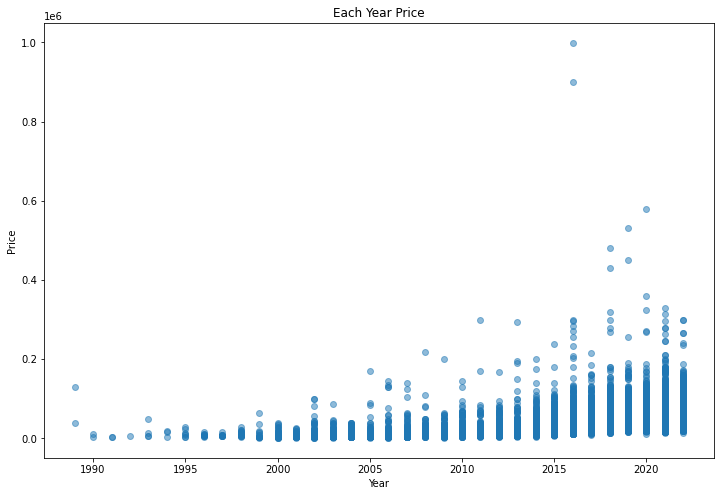

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['Year'], y=df['Price'], alpha=0.5)
plt.title('Each Year Price')
plt.xlabel('Year')
plt.ylabel('Price')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


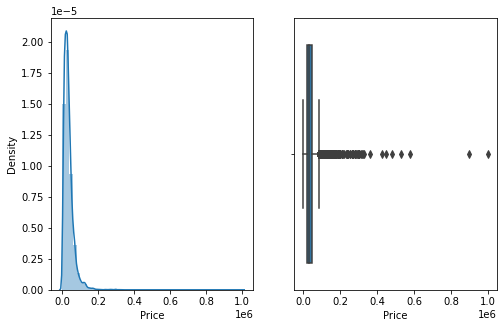

In [11]:
# Since it is a Right-skewed graph, I will be using IQR method.

plt.figure(figsize=(8,5))
plt.subplot(121)
sns.distplot(df['Price'])

plt.subplot(122)
sns.boxplot(df['Price'])

plt.show()

In [12]:
# These are the Quartile ranges Q3 and Q1
percentile75 = df['Price'].quantile(0.75)
percentile25= df['Price'].quantile(0.25)
print('percentile75 is: ', percentile75)
print('percentile25 is: ', percentile25)

# IQR=Inter-Quartile Range
iqr=percentile75 - percentile25
print('IQR is: ', iqr)

# Finding the upper limit and lower limit.
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
print('upper_limit is: ', upper_limit)
print('lower_limit is: ', lower_limit)

percentile75 is:  45990.0
percentile25 is:  18800.0
IQR is:  27190.0
upper_limit is:  86775.0
lower_limit is:  -21985.0


In [13]:
# Outliers above the upper_limit
df[df['Price']>upper_limit].shape


(805, 15)

In [14]:
# Outliers below the lower_limit
df[df['Price']<lower_limit].shape

(0, 15)

In [15]:
# Capping the values of outliers to upper_limit and lower_limit. 
df_cap=df.copy()
df_cap.shape

df_cap['Price']=np.where(df_cap['Price']>upper_limit, upper_limit, np.where(df_cap['Price']<lower_limit, lower_limit, df_cap['Price']))

In [16]:
df_cap.shape

(17048, 15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

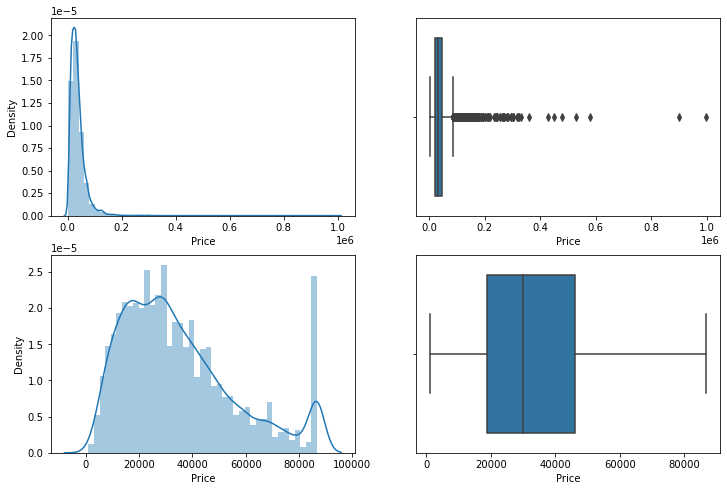

In [17]:
# Checking whether the outliers are capped
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(df['Price'])

plt.subplot(222)
sns.boxplot(df['Price'])

plt.subplot(223)
sns.distplot(df_cap['Price'])

plt.subplot(224)
sns.boxplot(df_cap['Price'])

plt.show()

In [18]:
df.describe()

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


In [19]:
df_cap.describe()

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,34880.590802,2015.481288,1.032314e+05,2491.830303,5.115849
std,21135.420707,4.721591,8.041313e+04,881.985562,1.121791
min,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,86775.000000,2022.000000,2.700000e+06,7300.000000,14.000000


Text(0, 0.5, 'Price')

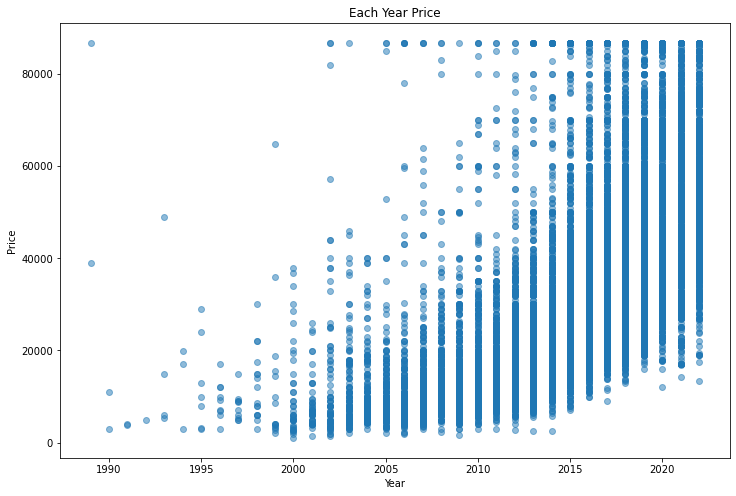

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_cap['Year'], y=df_cap['Price'], alpha=0.5)
plt.title('Each Year Price')
plt.xlabel('Year')
plt.ylabel('Price')

### Finding Outliers in 'CC'

Text(0, 0.5, 'CC')

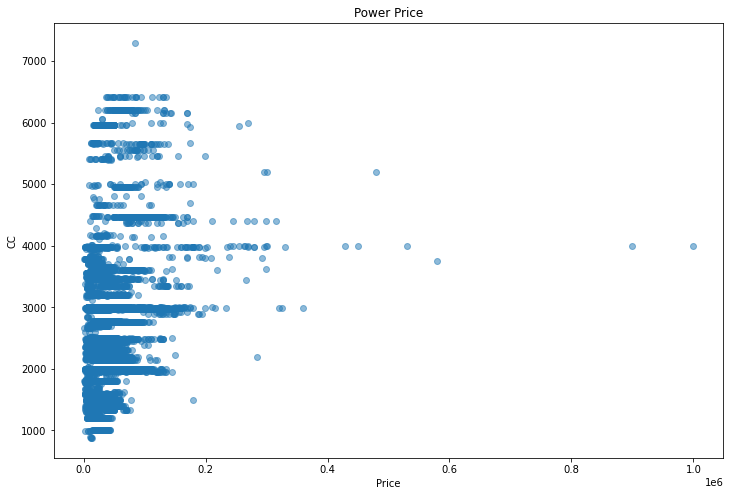

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['Price'], y=df['CC'], alpha=0.5)
plt.title('Power Price')
plt.xlabel('Price')
plt.ylabel('CC')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


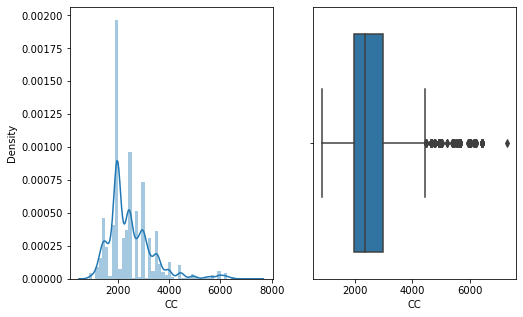

In [22]:
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.distplot(df['CC'])

plt.subplot(122)
sns.boxplot(df['CC'])

plt.show()

In [23]:
# These are the Quartile ranges Q3 and Q1
percentile75 = df['CC'].quantile(0.75)
percentile25= df['CC'].quantile(0.25)
print('percentile75 is: ', percentile75)
print('percentile25 is: ', percentile25)

# IQR=Inter-Quartile Range
iqr=percentile75 - percentile25
print('IQR is: ', iqr)

# Finding the upper limit and lower limit.
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
print('upper_limit is: ', upper_limit)
print('lower_limit is: ', lower_limit)

percentile75 is:  2981.0
percentile25 is:  1987.0
IQR is:  994.0
upper_limit is:  4472.0
lower_limit is:  496.0


In [24]:
# Outliers above the upper_limit
df[df['CC']>upper_limit].shape

(509, 15)

In [25]:
df[df['CC']<lower_limit].shape

(0, 15)

In [26]:
df_cap['CC']=np.where(df_cap['CC']>upper_limit, upper_limit, np.where(df_cap['CC']<lower_limit, lower_limit, df_cap['CC']))

In [27]:
df_cap.shape

(17048, 15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

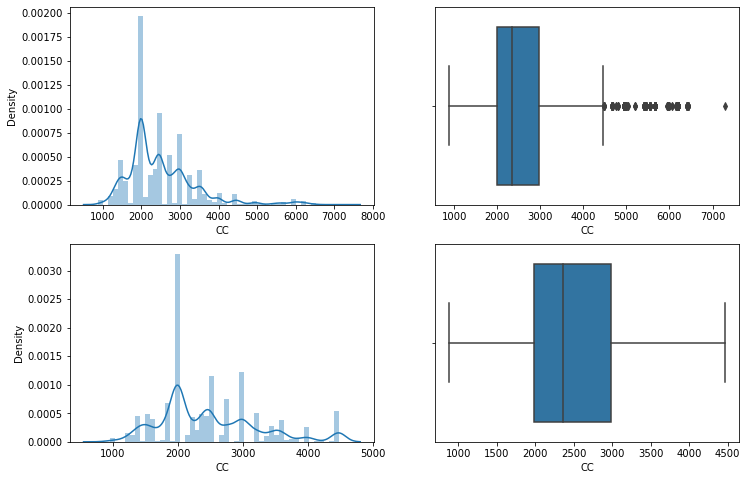

In [28]:
# Checking whether the outliers are capped
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.distplot(df['CC'])

plt.subplot(222)
sns.boxplot(df['CC'])

plt.subplot(223)
sns.distplot(df_cap['CC'])

plt.subplot(224)
sns.boxplot(df_cap['CC'])

plt.show()

Text(0, 0.5, 'CC')

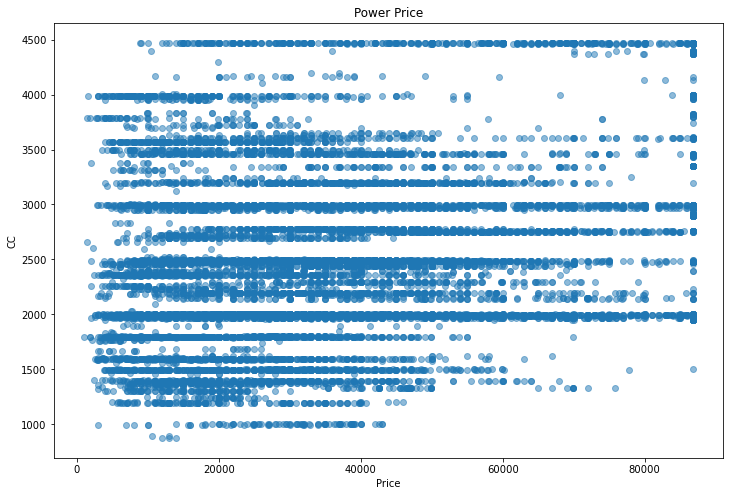

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_cap['Price'], y=df_cap['CC'], alpha=0.5)
plt.title('Power Price')
plt.xlabel('Price')
plt.ylabel('CC')

In [30]:
df_cap.corr(method='pearson')

,Price,Year,Kilometers,CC,Seating Capacity
Price,1.000000,0.632757,-0.555522,0.297102,0.097021
Year,0.632757,1.000000,-0.728515,-0.179375,0.044151
Kilometers,-0.555522,-0.728515,1.000000,0.209246,-0.013088
CC,0.297102,-0.179375,0.209246,1.000000,0.055694
Seating Capacity,0.097021,0.044151,-0.013088,0.055694,1.000000


In [31]:
# Correlation matrix between numeric columns
df_cap.corr(method='pearson')

,Price,Year,Kilometers,CC,Seating Capacity
Price,1.000000,0.632757,-0.555522,0.297102,0.097021
Year,0.632757,1.000000,-0.728515,-0.179375,0.044151
Kilometers,-0.555522,-0.728515,1.000000,0.209246,-0.013088
CC,0.297102,-0.179375,0.209246,1.000000,0.055694
Seating Capacity,0.097021,0.044151,-0.013088,0.055694,1.000000


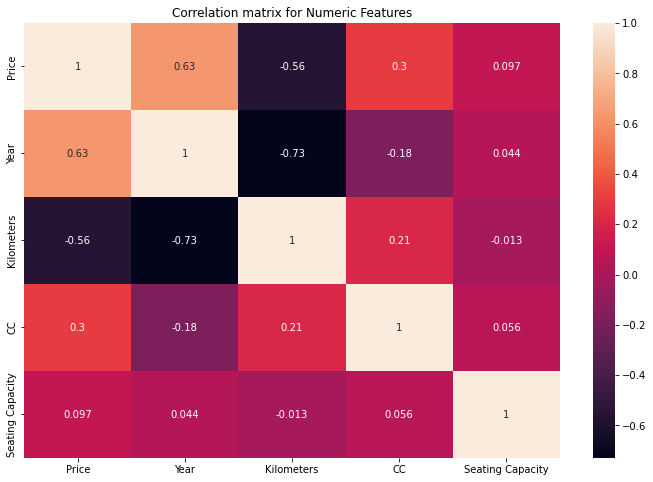

In [32]:
corr_matrix = df_cap.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.show()

In [33]:
# Converting all the columns in the dataset to numeric values.

df_numeric = df_cap

for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype=='object'):
        df_numeric[col_name]=df_numeric[col_name].astype('category')
        df_numeric[col_name]=df_numeric[col_name].cat.codes+1
        
df_numeric
    

,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,1677,9999.0,57,492,669,491,2010,263000,53,2,6,3,2362.0,77,5
1,7915,86775.0,40,574,282,199,2021,19,53,2,1,2,2143.0,16,7
2,7916,79990.0,40,582,100,199,2021,24,53,2,1,2,2143.0,16,8
3,1548,34990.0,40,211,680,80,2010,120579,5,2,1,3,2143.0,16,4
4,4285,15990.0,23,194,676,1173,2016,72506,46,2,6,3,1796.0,201,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,211,4499.0,23,184,900,2019,2003,230441,39,2,6,3,3791.0,71,5
17044,1095,4999.0,57,617,2347,1501,2008,237113,29,4,6,3,1299.0,206,5
17045,159,7999.0,23,344,1628,1910,2002,238768,53,2,1,3,2999.0,71,7
17046,4321,14000.0,25,325,498,972,2016,49800,29,4,6,3,1797.0,17,5


In [34]:
X=df_cap.drop('Price', axis=1)
y=df_cap['Price']

In [35]:
X.head()

,Name,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,1677,57,492,669,491,2010,263000,53,2,6,3,2362.0,77,5
1,7915,40,574,282,199,2021,19,53,2,1,2,2143.0,16,7
2,7916,40,582,100,199,2021,24,53,2,1,2,2143.0,16,8
3,1548,40,211,680,80,2010,120579,5,2,1,3,2143.0,16,4
4,4285,23,194,676,1173,2016,72506,46,2,6,3,1796.0,201,5


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

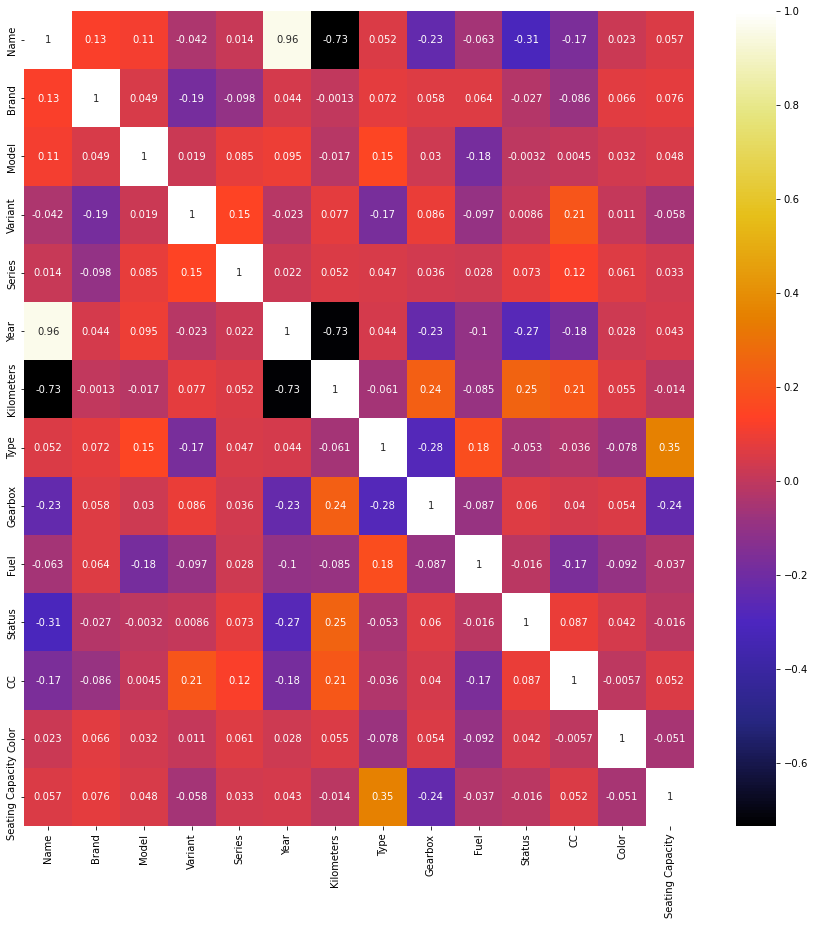

In [37]:
plt.figure(figsize=(15,15))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap)
plt.show()

In [38]:
# with the following function, we can select highly correlated features
# it will remove the first feature , that is related with any other feature 

def correlation(dataset, threshold):
    col_corr=set()                                       # To ensure that no values are repeated
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:       # To get absolute coeff values
                colname=corr_matrix.columns[i]           # Getting name of the columns
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train, 0.70)
len(set(corr_features))

2

In [40]:
corr_features

{'Kilometers', 'Year'}

In [41]:
# Year is highly correlated with Name , so we can drop either Year or Name from our dataset.
# Kilometer is highly correlated with Year, so we can drop either Kilometer or Year from dataset.